In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

669

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
#print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vao
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | sandusky
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | manggar
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | kapit
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | arraial do cabo
Pr

Processing Record 37 of Set 4 | grindavik
Processing Record 38 of Set 4 | athmallik
Processing Record 39 of Set 4 | fauske
Processing Record 40 of Set 4 | rach gia
Processing Record 41 of Set 4 | charleston
Processing Record 42 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 4 | okhotsk
Processing Record 44 of Set 4 | shahr-e babak
Processing Record 45 of Set 4 | ambon
Processing Record 46 of Set 4 | araouane
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | mehran
Processing Record 50 of Set 4 | victoria point
Processing Record 1 of Set 5 | hirara
Processing Record 2 of Set 5 | nuevo progreso
Processing Record 3 of Set 5 | conde
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | almunecar
Processing Record 6 of Set 5 | nabire
Processing Record 7 of Set 5 | maumere
Processing Record 8 of Set 5 | zima
Processing Record 9 of Set 5 | chlorakas
Proc

Processing Record 27 of Set 8 | taoudenni
Processing Record 28 of Set 8 | tanjong sepat
City not found. Skipping...
Processing Record 29 of Set 8 | kinango
Processing Record 30 of Set 8 | magole
Processing Record 31 of Set 8 | kimbe
Processing Record 32 of Set 8 | birjand
Processing Record 33 of Set 8 | oudtshoorn
Processing Record 34 of Set 8 | karpathos
Processing Record 35 of Set 8 | narsaq
Processing Record 36 of Set 8 | nuevo laredo
Processing Record 37 of Set 8 | beidao
Processing Record 38 of Set 8 | madang
Processing Record 39 of Set 8 | dawson creek
Processing Record 40 of Set 8 | izhevskoye
Processing Record 41 of Set 8 | ozernovskiy
Processing Record 42 of Set 8 | sao jose de ribamar
Processing Record 43 of Set 8 | kyzyl-suu
Processing Record 44 of Set 8 | oranjemund
Processing Record 45 of Set 8 | grand forks
Processing Record 46 of Set 8 | klaksvik
Processing Record 47 of Set 8 | maneadero
Processing Record 48 of Set 8 | iqaluit
Processing Record 49 of Set 8 | mitu
Process

Processing Record 14 of Set 12 | watertown
Processing Record 15 of Set 12 | bosobolo
Processing Record 16 of Set 12 | broome
Processing Record 17 of Set 12 | bergen
Processing Record 18 of Set 12 | harsud
Processing Record 19 of Set 12 | alice springs
Processing Record 20 of Set 12 | guasdualito
Processing Record 21 of Set 12 | shelburne
Processing Record 22 of Set 12 | sitka
Processing Record 23 of Set 12 | hauterive
Processing Record 24 of Set 12 | halifax
Processing Record 25 of Set 12 | natal
Processing Record 26 of Set 12 | wufeng
Processing Record 27 of Set 12 | omagh
Processing Record 28 of Set 12 | guarapari
Processing Record 29 of Set 12 | yerbogachen
Processing Record 30 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 31 of Set 12 | esmeraldas
Processing Record 32 of Set 12 | darlowo
Processing Record 33 of Set 12 | vitim
Processing Record 34 of Set 12 | kondinskoye
Processing Record 35 of Set 12 | kununurra
Processing Record 36 of Set 12 | aldan


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,73.18,87,100,13.51,NC,2021-11-25 16:53:59
1,Albany,42.6001,-73.9662,45.75,67,97,3.02,US,2021-11-25 16:51:36
2,Punta Arenas,-53.1500,-70.9167,51.91,54,75,29.93,CL,2021-11-25 16:53:59
3,Bluff,-46.6000,168.3333,57.72,69,94,13.78,NZ,2021-11-25 16:54:00
4,Sandusky,41.3501,-83.1332,46.63,78,100,1.99,US,2021-11-25 16:54:00
5,Avarua,-21.2078,-159.7750,75.25,94,36,5.75,CK,2021-11-25 16:49:08
6,Port Alfred,-33.5906,26.8910,64.58,68,95,22.46,ZA,2021-11-25 16:49:41
7,Manggar,-2.8833,108.2667,79.39,83,58,3.49,ID,2021-11-25 16:54:02
8,Bengkulu,-3.8004,102.2655,77.09,84,61,3.69,ID,2021-11-25 16:54:03
9,Puerto Ayora,-0.7393,-90.3518,78.76,87,52,7.00,EC,2021-11-25 16:51:12


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df =city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vao,NC,2021-11-25 16:53:59,-22.6667,167.4833,73.18,87,100,13.51
1,Albany,US,2021-11-25 16:51:36,42.6001,-73.9662,45.75,67,97,3.02
2,Punta Arenas,CL,2021-11-25 16:53:59,-53.1500,-70.9167,51.91,54,75,29.93
3,Bluff,NZ,2021-11-25 16:54:00,-46.6000,168.3333,57.72,69,94,13.78
4,Sandusky,US,2021-11-25 16:54:00,41.3501,-83.1332,46.63,78,100,1.99


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

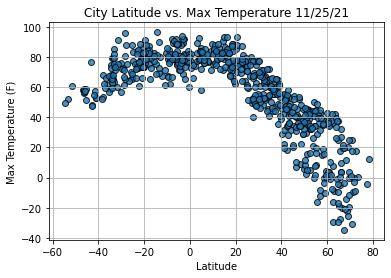

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

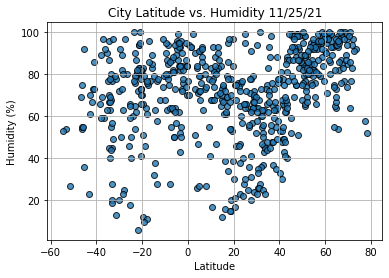

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

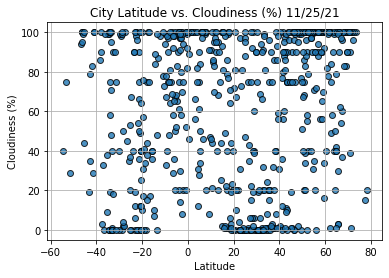

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

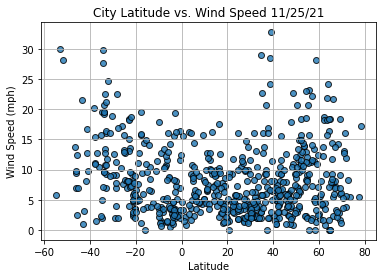

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()